The IMU log files column are, the Timestamp in ms, linear acceleration in x,y,z axis given in gravity unit, roll and pitch angle from accelerometer in degree, gyroscope x,y,z in degree/s, and magnetometer field strength in x,y,z axis in Gauss unit.


### Task 1a

From the measurement record log file which either is given to you or you collected yourselves, visualize the data. Read the Section 2.3.1 in order to understand what each column represents. What do you observe? Summarize what you have understood and write it down in your report.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
datapath = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/showfun/showfun_imu_1xcc.csv'
dataset1 = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/dataset1/data/task1/imu_reading_task1.csv'

In [5]:
#load csv file
df = pd.read_csv(datapath)
#display first 5 rows
df.head()

,1699620606.81079698,-0.00353800,-0.00597800,1.00711000,-0.05314521,0.05779201,0.09796500,-0.28400750,-0.22267000,0.33572055,0.90558316,-1.96974569
0,1.699621e+09,-0.003416,-0.006466,1.004670,0.104637,0.086701,-0.042035,-0.074008,0.09233,0.335867,0.908652,-1.968869
1,1.699621e+09,-0.001098,-0.008296,1.004548,-0.006426,-0.032145,-0.007035,-0.214007,-0.04767,0.335867,0.908652,-1.968869
2,1.699621e+09,-0.003294,-0.006222,1.004914,0.041516,0.093822,-0.077035,0.065992,0.05733,0.334259,0.905583,-1.969892
3,1.699621e+09,-0.001464,-0.008540,1.005646,-0.088551,0.141420,0.097965,-0.109007,0.02233,0.330020,0.907483,-1.976615
4,1.699621e+09,0.000854,-0.007442,1.004060,0.133798,0.044150,0.027965,0.065992,-0.25767,0.330020,0.907483,-1.976615


In [6]:
# give names to columns
#linear acceleration in x,y,z axis given in gravity unit, roll and pitch angle from accelerometer in degree, gyroscope x,y,z in degree/s, and magnetometer field strength in x,y,z axis in Gauss unit.
df.columns = ['timestamp','acc_x','acc_y','acc_z','roll','pitch','gyro_x','gyro_y','gyro_z','mag_x','mag_y','mag_z']
#converst timestamp to seconds


In [7]:
df.head()

,timestamp,acc_x,acc_y,acc_z,roll,pitch,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
0,1.699621e+09,-0.003416,-0.006466,1.004670,0.104637,0.086701,-0.042035,-0.074008,0.09233,0.335867,0.908652,-1.968869
1,1.699621e+09,-0.001098,-0.008296,1.004548,-0.006426,-0.032145,-0.007035,-0.214007,-0.04767,0.335867,0.908652,-1.968869
2,1.699621e+09,-0.003294,-0.006222,1.004914,0.041516,0.093822,-0.077035,0.065992,0.05733,0.334259,0.905583,-1.969892
3,1.699621e+09,-0.001464,-0.008540,1.005646,-0.088551,0.141420,0.097965,-0.109007,0.02233,0.330020,0.907483,-1.976615
4,1.699621e+09,0.000854,-0.007442,1.004060,0.133798,0.044150,0.027965,0.065992,-0.25767,0.330020,0.907483,-1.976615


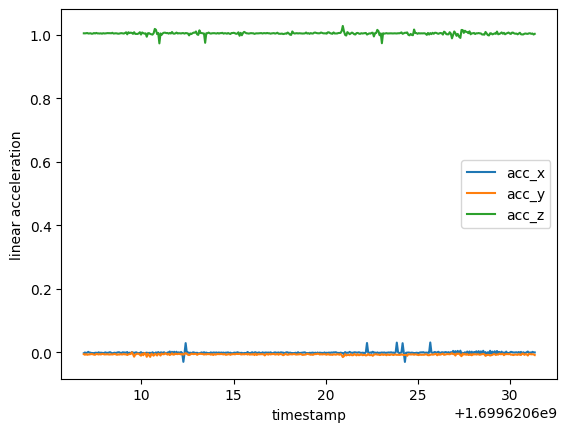

In [8]:
#plotting the data
# plt.figure(figsize=(20,10))
def plot_data(df):
    plt.plot(df['timestamp'],df['acc_x'])
    plt.plot(df['timestamp'],df['acc_y'])   
    plt.plot(df['timestamp'],df['acc_z'])
    plt.xlabel('timestamp')
    plt.ylabel('linear acceleration')
    plt.legend(['acc_x','acc_y','acc_z'])
    plt.show()
plot_data(df)


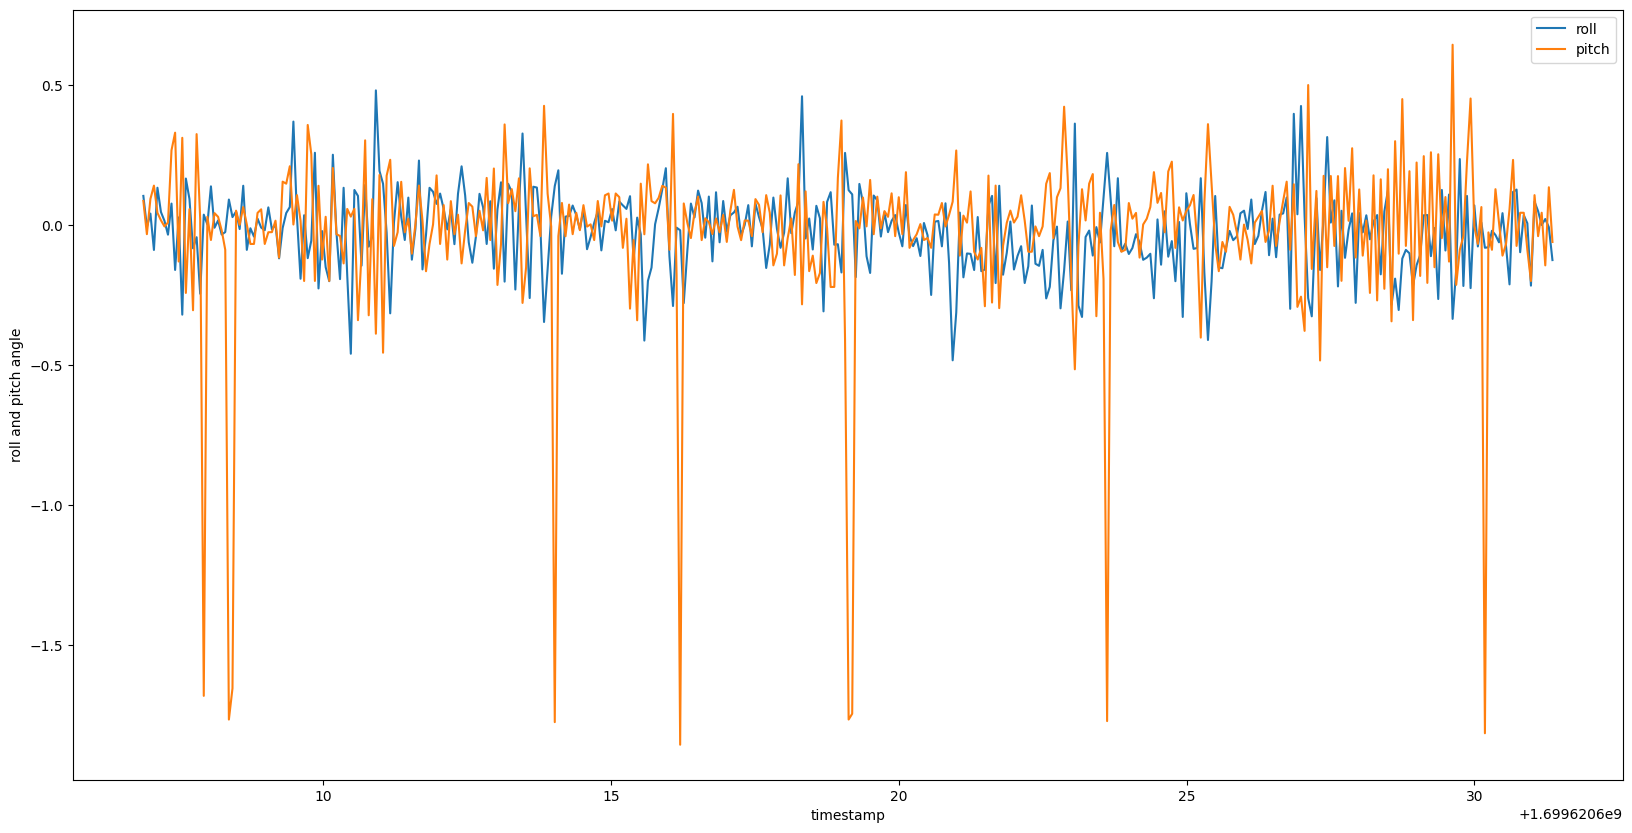

In [9]:
#visualize pitch , roll
def plot_pitch_roll(df):
    plt.figure(figsize=(20,10))
    plt.plot(df['timestamp'],df['roll'])
    plt.plot(df['timestamp'],df['pitch'])
    plt.xlabel('timestamp')
    plt.ylabel('roll and pitch angle')
    plt.legend(['roll','pitch'])
    plt.show()
plot_pitch_roll(df)

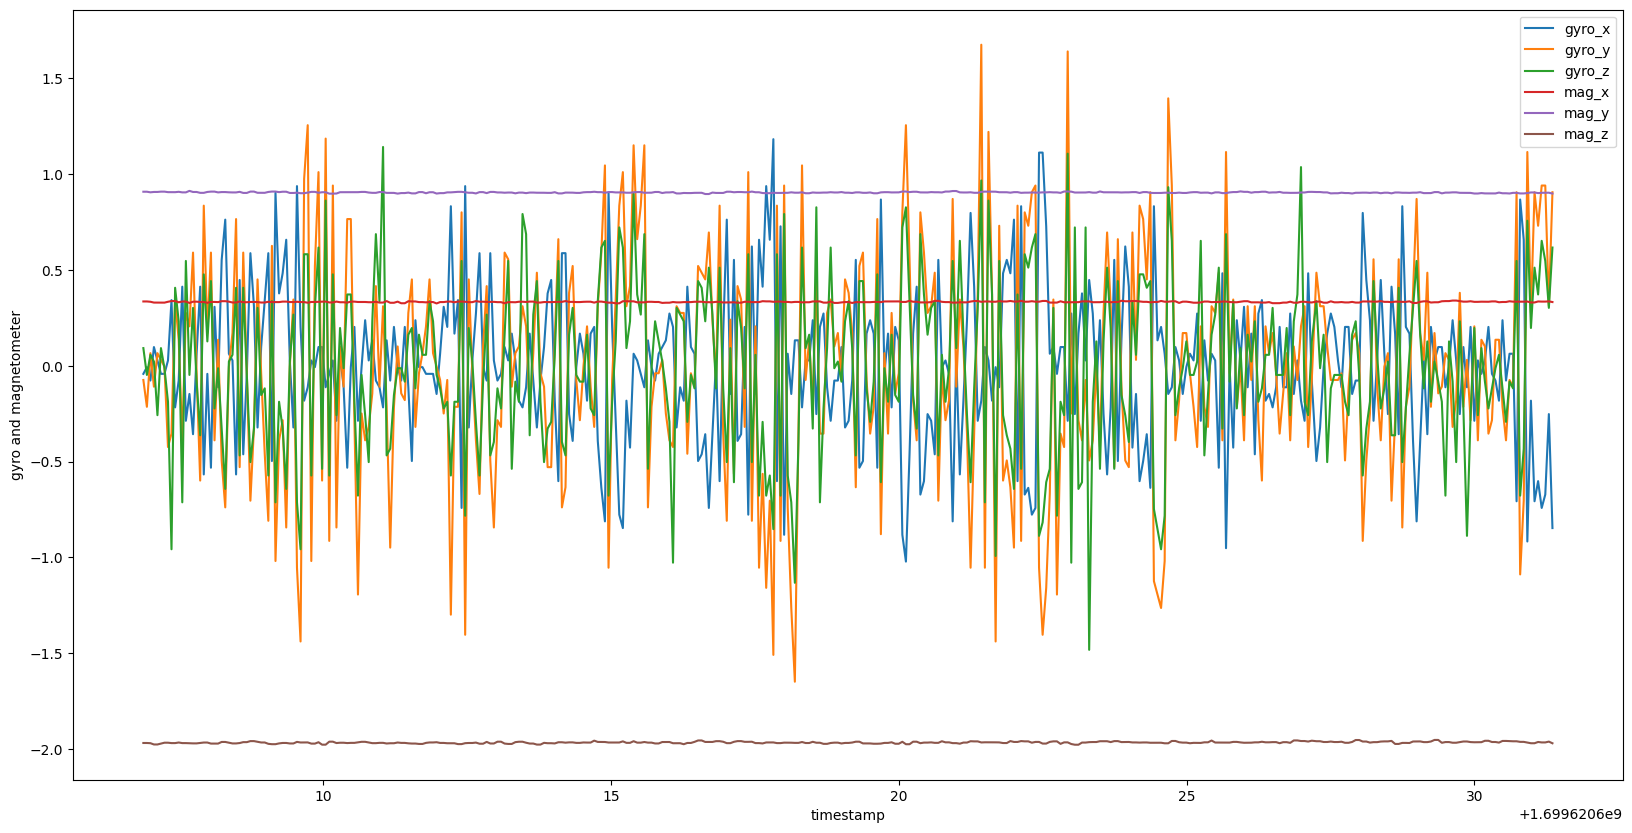

In [10]:
#plot the rest of the data
def plot_data_rest(df):
    plt.figure(figsize=(20,10))
    plt.plot(df['timestamp'],df['gyro_x'])
    plt.plot(df['timestamp'],df['gyro_y'])
    plt.plot(df['timestamp'],df['gyro_z'])
    plt.plot(df['timestamp'],df['mag_x'])
    plt.plot(df['timestamp'],df['mag_y'])
    plt.plot(df['timestamp'],df['mag_z'])
    plt.xlabel('timestamp')
    plt.ylabel('gyro and magnetometer')
    plt.legend(['gyro_x','gyro_y','gyro_z','mag_x','mag_y','mag_z'])
    plt.show()

plot_data_rest(df)


## Task1b




Task 1b. Determine the bias and variance of the gyroscope in the IMU sensors and write down the result in your report

In [11]:


#determine the variance of 'acc_x','acc_y','acc_z'
variance = df[['acc_x','acc_y','acc_z']].var()
print(variance)
#determin in the bias of 'acc_x','acc_y','acc_z'
bias = df[['acc_x','acc_y','acc_z']].mean()
print(bias)



acc_x    0.000020
acc_y    0.000003
acc_z    0.000018
dtype: float64
acc_x   -0.001556
acc_y   -0.007311
acc_z    1.004354
dtype: float64


/tmp/ipykernel_976/1922857845.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df['timestamp'],[bias[0]]*len(df['timestamp']))
/tmp/ipykernel_976/1922857845.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df['timestamp'],[bias[1]]*len(df['timestamp']))
/tmp/ipykernel_976/1922857845.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df['timestamp'],[bias[2]]*len(df['timestamp']))


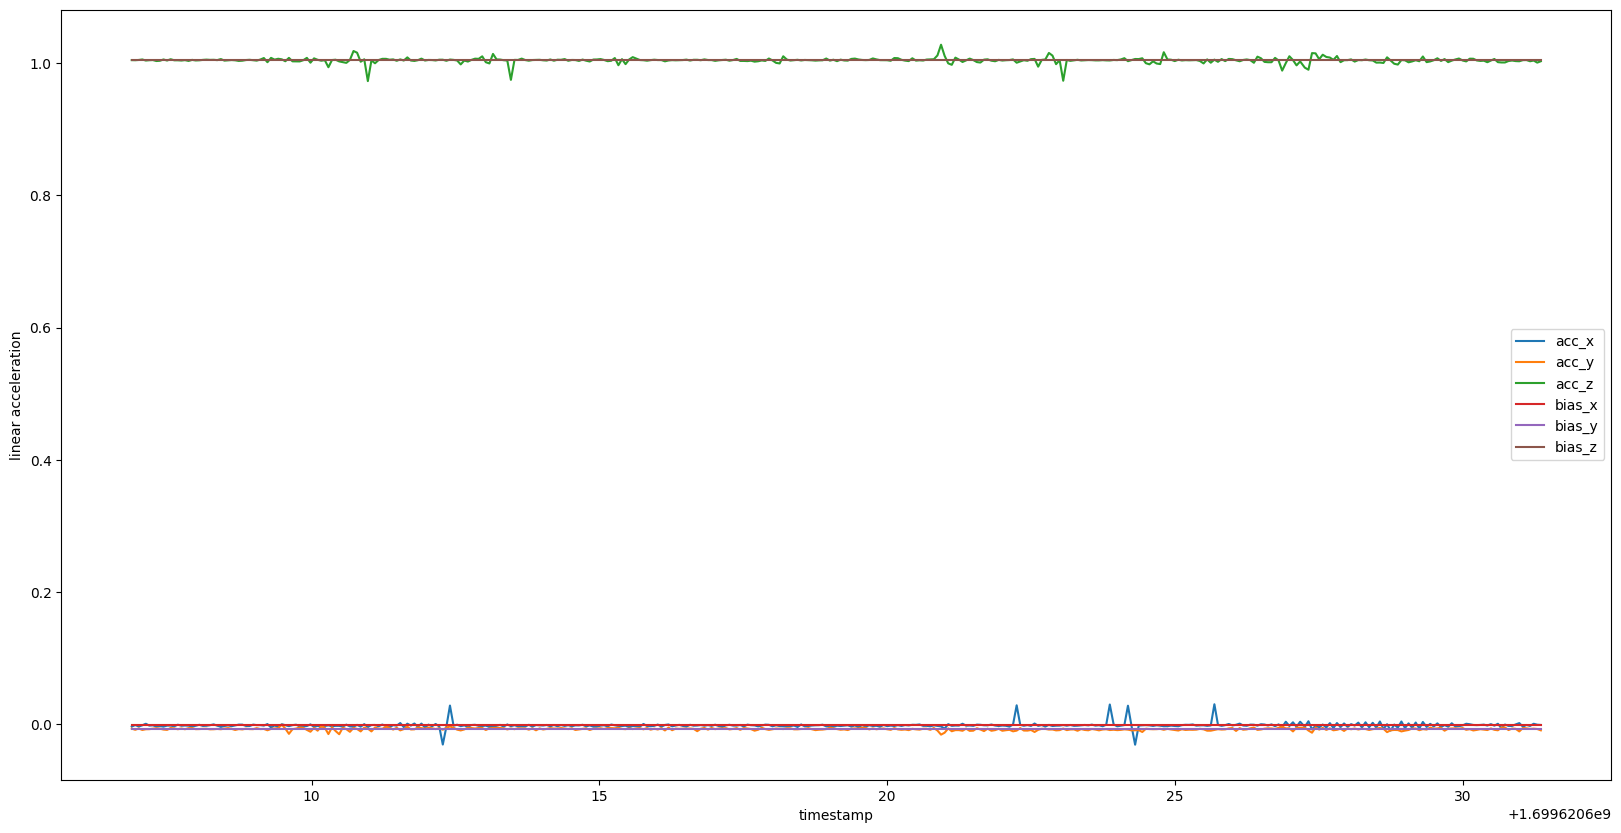

In [12]:
#plot the bias of 'acc_x','acc_y','acc_z' along with the data
plt.figure(figsize=(20,10))
plt.plot(df['timestamp'],df['acc_x'])
plt.plot(df['timestamp'],df['acc_y'])
plt.plot(df['timestamp'],df['acc_z'])
plt.plot(df['timestamp'],[bias[0]]*len(df['timestamp']))
plt.plot(df['timestamp'],[bias[1]]*len(df['timestamp']))
plt.plot(df['timestamp'],[bias[2]]*len(df['timestamp']))
plt.xlabel('timestamp') 
plt.ylabel('linear acceleration')
plt.legend(['acc_x','acc_y','acc_z','bias_x','bias_y','bias_z'])
plt.show()


## Task2

Plot the data from the measurement record log file. What did you observe? Determine the gain ki and bias bi for each body axis i = {x, y, z}. Write down the results in your report.

In [29]:
dataset2 = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/showfun/showfun_imu_task2_2_imu.csv'
predataset = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/dataset1/data/task2/imu_calibration_task2.csv'
df2 = pd.read_csv(dataset2)
df2.columns = ['timestamp','acc_x','acc_y','acc_z','roll','pitch','gyro_x','gyro_y','gyro_z','mag_x','mag_y','mag_z']
df2.head()


,timestamp,acc_x,acc_y,acc_z,roll,pitch,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
0,1.699626e+09,-0.001220,-0.008052,1.004670,0.161533,0.032511,-0.308157,0.344137,0.239925,0.407337,0.833967,-1.938468
1,1.699626e+09,-0.001586,-0.008296,1.005768,-0.039481,0.053223,0.006842,0.099138,-0.040075,0.407337,0.833967,-1.938468
2,1.699626e+09,0.000366,-0.006832,1.000278,0.069730,-0.141943,-0.063158,0.589137,0.344925,0.405145,0.831482,-1.937153
3,1.699626e+09,-0.000488,-0.006710,1.003938,0.182546,0.164717,0.041842,0.099138,-0.005075,0.402222,0.833821,-1.946799
4,1.699626e+09,-0.000366,-0.006344,1.004182,0.138927,-0.016111,-0.098157,0.134137,0.099925,0.402222,0.833821,-1.946799


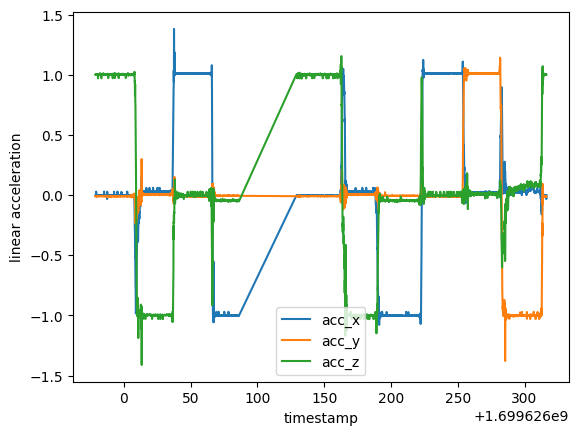

In [30]:
#plot the data
plot_data(df2)


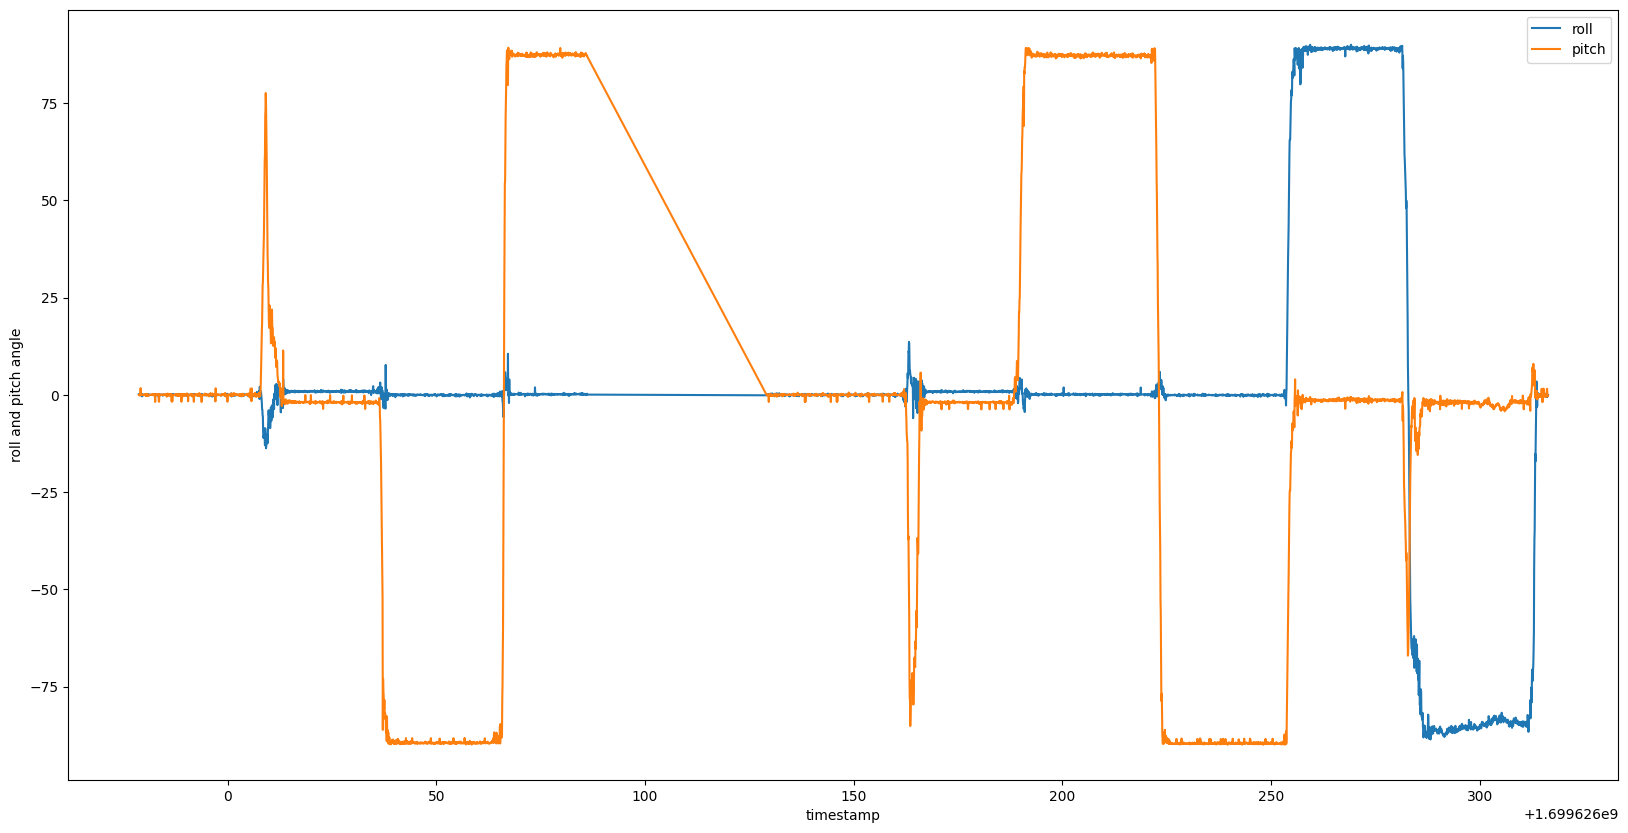

In [20]:
plot_pitch_roll(df2)

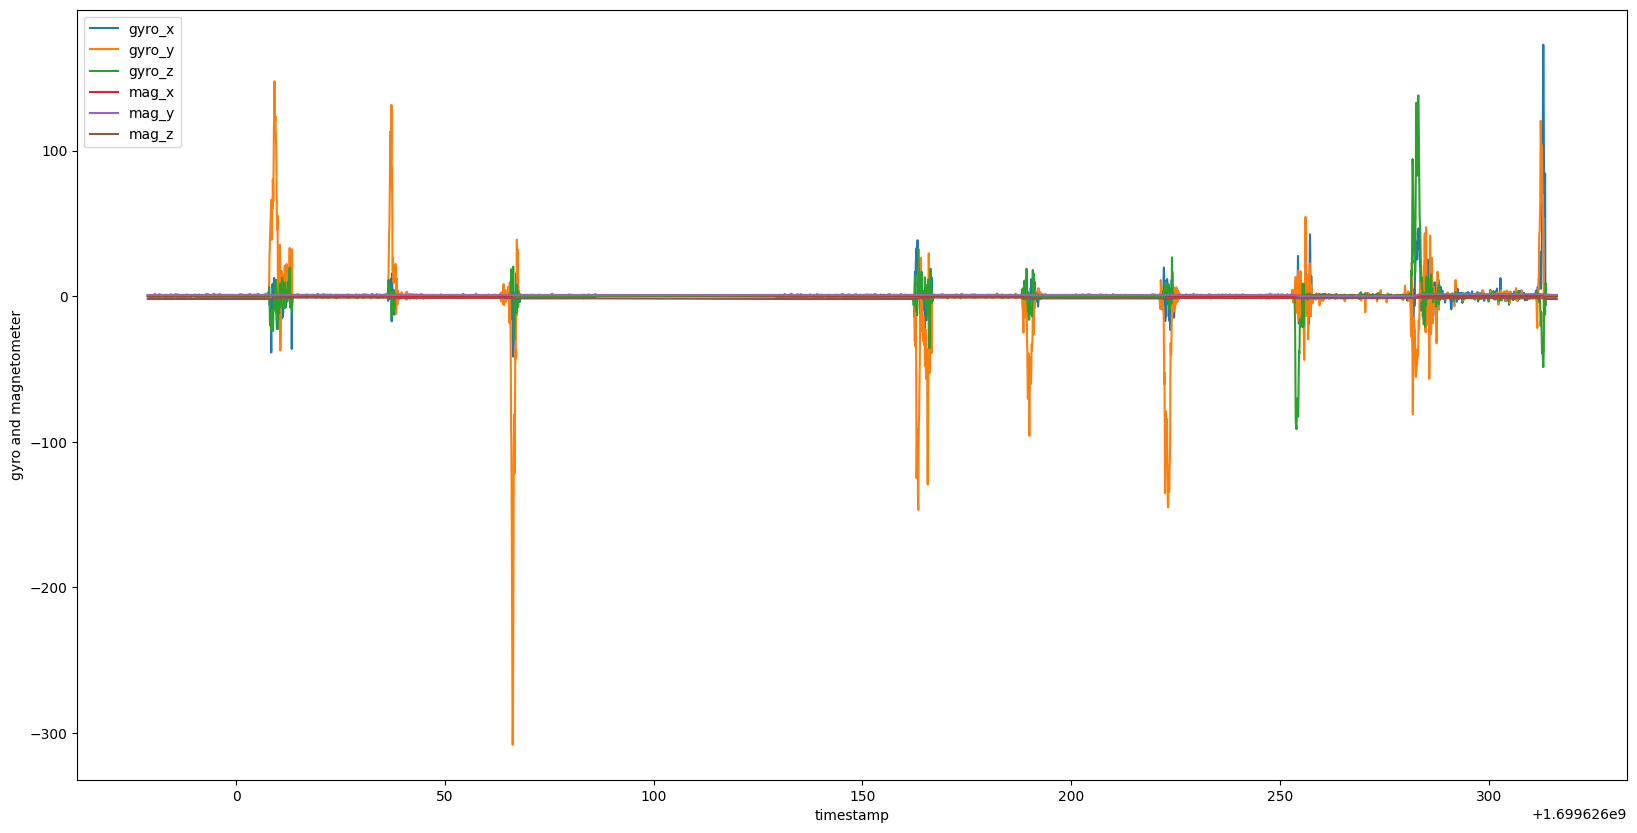

In [21]:
plot_data_rest(df2)

In [22]:
df['acc_x']

0     -0.003416
1     -0.001098
2     -0.003294
3     -0.001464
4      0.000854
         ...   
389   -0.000976
390   -0.002440
391    0.000854
392   -0.000610
393   -0.000976
Name: acc_x, Length: 394, dtype: float64

## Task 3a
Task 3a. There are two columns in the measurement record log file. The first represents the measured distance (in cm) and the second column represents the height (in pixel) measured from the terminal. You need to plot the data as described above and determine the gradient and bias. Write down the results in your report. Note that, you also need to consider the distance of the camera from the surface of the robot. It is provided in readme.txt file with the data for students who use available data.

In [32]:
camaera_log_path = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/showfun/showfun_camera_task3_2_camera.csv'
df3 = pd.read_csv(camaera_log_path)
# df3.columns = ['Time_stamp',]
df3

,1699625416.9679377,3,33,-60,370,358,17.318435754189945,3.502686126728226
0,1.699625e+09,3,33,-60,370,359,17.270195,3.502686
1,1.699625e+09,3,33,-60,369,359,17.270195,3.502686
2,1.699625e+09,3,34,-60,373,359,17.270195,3.608552
3,1.699625e+09,3,34,-60,372,359,17.270195,3.608552
4,1.699625e+09,3,33,-60,369,360,17.222222,3.502686
...,...,...,...,...,...,...,...,...
395,1.699626e+09,3,-6,52,44,45,137.777778,-0.637620
396,1.699626e+09,3,-6,52,44,44,140.909091,-0.637620
397,1.699626e+09,3,-6,51,44,45,137.777778,-0.637620
398,1.699626e+09,3,-6,51,44,45,137.777778,-0.637620


In [47]:
preSavedData = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/dataset2/data/task3/camera_module_calibration_task3.csv'
df4 = pd.read_csv(preSavedData)
df4.columns = ['Distance_cm','Pixel_height']
df4.head()
#add 5 + 1.7 cm to the distance
df4['Distance_cm'] = df4['Distance_cm'] + 6.7

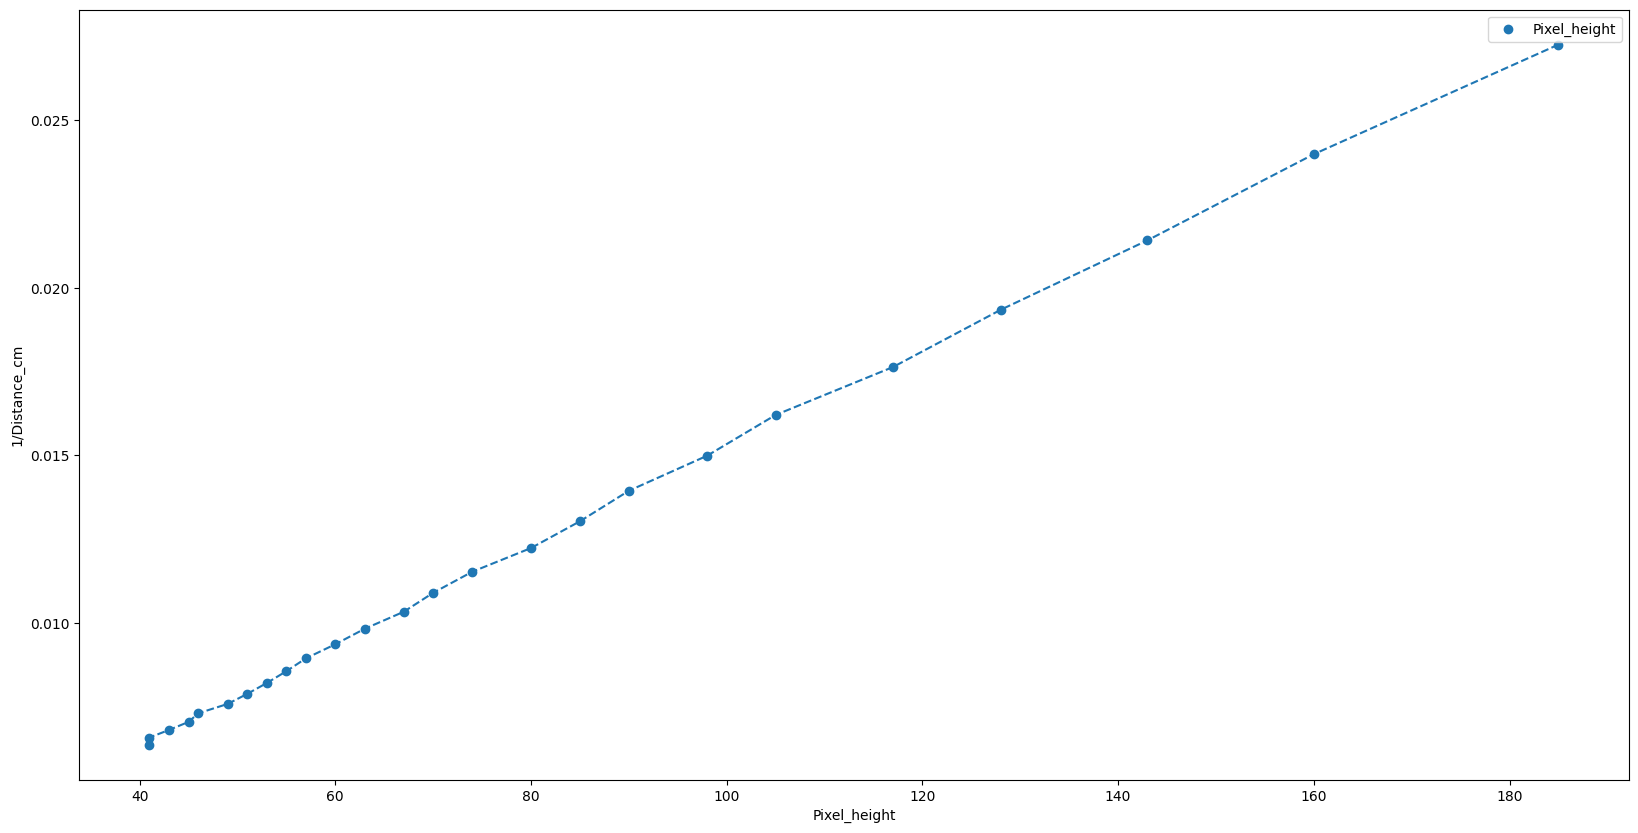

In [48]:
#plot the data
inverted_distance = 1/df4['Distance_cm']
plt.figure(figsize=(20,10))

plt.scatter(df4['Pixel_height'],inverted_distance)
#draw a straight dotted line to show the linear relationship
plt.plot(df4['Pixel_height'],inverted_distance,'--')
plt.xlabel('Pixel_height')
plt.ylabel('1/Distance_cm')
plt.legend(['Pixel_height'])
plt.show()
# plt.plot(df4['Distance_cm'],df4['Pixel_height'])
# plt.xlabel('Distance_cm')
# plt.ylabel('Pixel_height')
# plt.legend(['Pixel_height'])
# plt.show()

In [46]:
# user linear regression to find the slope and intercept
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#convert the data to numpy array
x = np.array(df4['Pixel_height']).reshape((-1,1))
y = np.array(inverted_distance)
# print(x)
# print(y)
# create a linear regression model
model = LinearRegression()
#fit the model
model.fit(x,y)
#predict the y value
y_pred = model.predict(x)
#calculate the mean squared error
mse = mean_squared_error(y,y_pred)
print('mse = ',mse)
#calculate the gradient and bias
print('gradient = ',model.coef_)
print('bias = ',model.intercept_)

mse =  4.742977402913523e-08
gradient =  [0.00018251]
bias =  -0.0009511181365989153


x_3 = h_0 *f/h +d
gradient = h_0 *f
f = gradient/h_0

In [51]:
h0 = 11.5
focusLenght = model.coef_/h0
print('focusLenght = ',focusLenght)
#focusLength in power
focusLengthPower = 1/focusLenght
print('focusLengthPower = ',focusLengthPower)

focusLenght =  [1.58701596e-05]
focusLengthPower =  [63011.33839516]


### Task4 

There are two columns in the measurement record log file. The first represents the distance (in cm) measured from the measuring tape and the second column represents the measured time (in s). You need to determine the speed of the robot. Write down the results in your report. Note that, you need to determine the distance interval from the given log file.


In [62]:
distanceDataset = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/dataset2/data/task4/robot_speed_task4.csv'
df5 = pd.read_csv(distanceDataset)
df5.columns = ['Distance_cm','Time_seconds']
df5.head()

,Distance_cm,Time_seconds
0,80,7.62
1,120,7.13
2,160,7.56
3,200,7.17
4,240,7.26


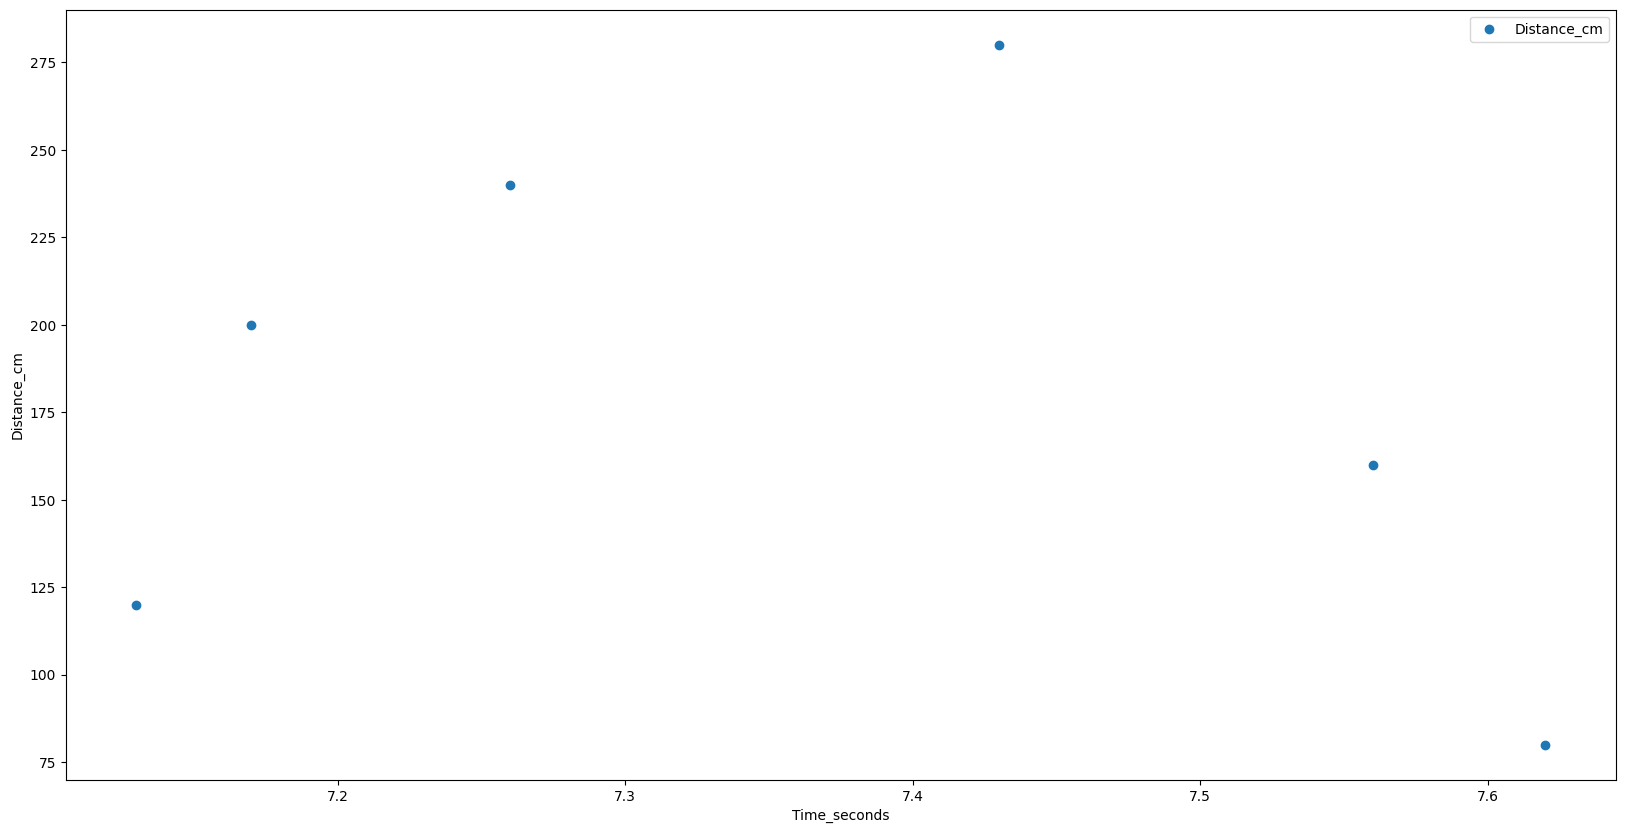

In [63]:
#sum the time
# df5['Time_seconds'] = df5['Time_seconds'].cumsum()

#plot the data
plt.figure(figsize=(20,10))
plt.scatter(df5['Time_seconds'],df5['Distance_cm'])
plt.xlabel('Time_seconds')
plt.ylabel('Distance_cm')
plt.legend(['Distance_cm'])
plt.show()

In [66]:
#make all the distance 40 cm
df5['Distance_cm'] = 40

#calculate the velocity
velocity = df5['Distance_cm']/df5['Time_seconds']

In [68]:
df5

,Distance_cm,Time_seconds
0,40,7.62
1,40,7.13
2,40,7.56
3,40,7.17
4,40,7.26
5,40,7.43


In [67]:
print('velocity = ',velocity.mean())

velocity =  5.437078301942729
